<a href="https://colab.research.google.com/github/srikarthadaka/data_analysis/blob/main/Adipose_Tissue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AdiposeTissue.csv to AdiposeTissue.csv


In [3]:
df = pd.read_csv("AdiposeTissue.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [5]:
df.isnull().sum()

Waist    0
AT       0
dtype: int64

In [6]:
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [7]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


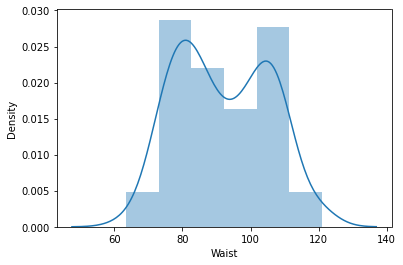

In [8]:
sns.distplot(df['Waist'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


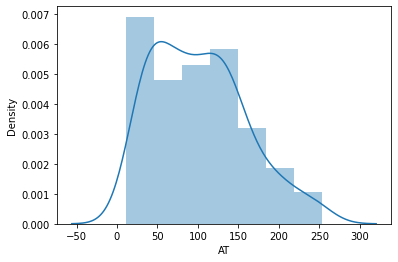

In [9]:
sns.distplot(df['AT'])

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = df).fit()

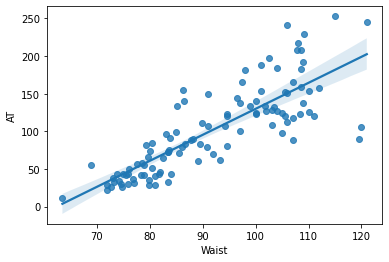

In [11]:
sns.regplot(x="Waist", y="AT", data=df);

In [12]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    
print(f'model t-values:\n{model.tvalues}\n-----------------\nmodel p-values: \n{model.pvalues}')    

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64
model t-values:
Intercept    -9.909103
Waist        14.740376
dtype: float64
-----------------
model p-values: 
Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.670036893052843, 0.6669531256981966)

In [15]:
#Predict for 75 and 80 values
newdata=pd.Series([48,78,80,203,105])
data_pred=pd.DataFrame(newdata,columns=['Waist'])
model.predict(data_pred)

0    -49.956237
1     53.809545
2     60.727263
3    486.166969
4    147.198748
dtype: float64